<a href="https://colab.research.google.com/github/llcorrea/titanic_competition/blob/master/Titanic_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Machine Learning from Disaster**

Titanic Dataset from Kaggle Competition

In [34]:
import sys
import io
import pdb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression 
from google.colab import files

# **Loading CSV files into Colab from a local drive**

In [2]:
try:
  train_data = pd.read_csv('train.csv')  
except:
  uploaded = files.upload()
  train_data = pd.read_csv('train.csv')

try:
  test_data = pd.read_csv('test.csv')
except:
  uploaded = files.upload()
  test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving train.csv to train.csv


Saving test.csv to test.csv


# **EDA step**

> **Total de dados:** 891 registros\
> **Total de features:** 12 features\
> **Feature alvo:** Survived

* Cada registro representa um passageiro do Titanic.

* A feature alvo indica se um determinado passageiro sobreviveu ou não ao naufrágio. 

* Essa feature alvo (Survived) é utilizada na formulação do problema de ML, que visa prever se um determinado passageiro sobreviveu ou não considerando os outros 11 atributos do dataset.

In [3]:
print(train_data.head())
print(test_data.head())

#print(train_data.shape)
#print(train_data.tail())
#print(train_data.columns)
#print(train_data.describe())
print(train_data.info())
#print(train_data.isnull().sum())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3 

**Análise das features mais relevantes:**

> **Feature Survived:** Indica se o passageiro sobreviveu ou não ao naufrágio.

* Sem dados faltantes.
* Valores desbalanceados, onde 62% das pessoas morreram.

Total de valores da feature Survived:
0    549
1    342
Name: Survived, dtype: int64
Porcentagem total de valores da feature Survived:
0    0.616162
1    0.383838
Name: Survived, dtype: float64

Classes de valores únicos da feature Survived:
[0 1]



Text(0.5, 1.0, 'Distribuição de valores para a feature Survived')

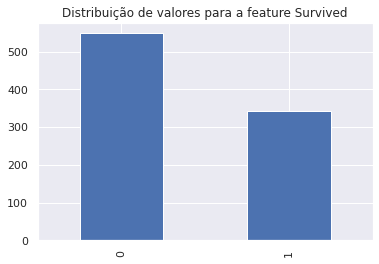

In [38]:
var='Survived' #indica se a pessoa sobreviveu ou não
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 62% das pessoas morreram
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature

ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

> **Feature Sex:**

* Sem dados faltantes.
* Valores desbalanceados, onde 65% das pessoas eram homens.

Total de valores da feature Sex:
male      577
female    314
Name: Sex, dtype: int64
Porcentagem total de valores da feature Sex:
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Classes de valores únicos da feature Sex:
['male' 'female']



Text(0.5, 1.0, 'Distribuição de valores para a feature Sex')

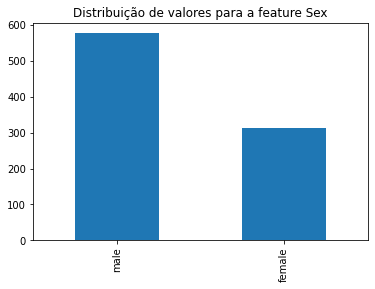

In [5]:
var='Sex'
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 65% das pessoas eram homens
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

> **Feature Age:**

> Distribuição dos valores:\
**count:**     714\
**missing:**   177\
**mean:**      29.7 anos\
**std:**       14.5 anos\
**min:**      0.4 anos\
**25%:**       20.1 anos\
**50%:**       28 anos\
**75%:**      38 anos\
**max:**       80 anos

* Valores desbalanceados, variando entre 0.4 e 80 anos.
* 50% das pessoas apresentam menos de 28 anos.
* 75% das pessoas apresentam menos de 38 anos.
* Maior concentração de pessoas com idades entre 20 e 40 anos.

> * Porcentagem de pessoas com menos de 20 anos:  18.4%
* Porcentagem de pessoas do sexo masculino com menos de 20 anos:  10%
* Porcentagem de pessoas do sexo feminino com menos de 20 anos:  8.4%
* Porcentagem de pessoas entre 20 e 40 anos:  44.9%
* Porcentagem de pessoas entre 41 e 65 anos:  15.7%

Total de valores da feature Age:
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
Porcentagem total de valores da feature Age:
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
           ...   
55.50    0.001401
70.50    0.001401
66.00    0.001401
23.50    0.001401
0.42     0.001401
Name: Age, Length: 88, dtype: float64

Classes de valores únicos da feature Age:
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   

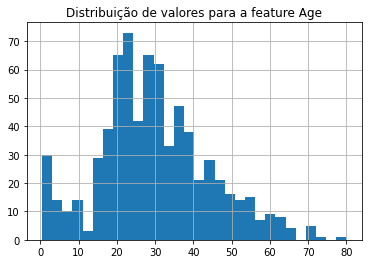

In [6]:
var='Age'
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, maior concentração de pessoas com idades entre 20 e 40 anos
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
print(train_data[var].describe())
ax=train_data[var].hist(bins=30)
ax.set_title('Distribuição de valores para a feature '+var)

print('Porcentagem de pessoas com menos de 20 anos: ', len(train_data[train_data['Age']<20])/len(train_data)*100)
print('Porcentagem de pessoas do sexo masculino com menos de 20 anos: ', len(train_data[(train_data['Age']<20) & (train_data['Sex']=='male')])/len(train_data)*100)
print('Porcentagem de pessoas do sexo feminino com menos de 20 anos: ', len(train_data[(train_data['Age']<20) & (train_data['Sex']=='female')])/len(train_data)*100)
print('Porcentagem de pessoas entre 20 e 40 anos: ', len(train_data[(train_data['Age']>=20) & (train_data['Age']<=40)])/len(train_data)*100)
print('Porcentagem de pessoas entre 41 e 65 anos: ', len(train_data[(train_data['Age']>=41) & (train_data['Age']<=65)])/len(train_data)*100)

> **Feature Pclass:** Indica a classe ocupada no navio, sendo elas: classe 1 (primeira classe), classe 2 (intermediária) e classe 3 (mais econômica).

* Sem dados faltantes.
* Valores desbalanceados, onde 55% das pessoas ocupam a classe 3ª classe (mais econômica), 25% ocupam a 2ª classe (intermediária) e 20% estão na primeira classe (mais cara).

Total de valores da feature Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Porcentagem total de valores da feature Pclass:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Classes de valores únicos da feature Pclass:
[3 1 2]



Text(0.5, 1.0, 'Distribuição de valores para a feature Pclass')

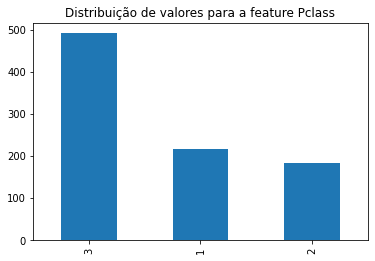

In [7]:
var='Pclass' #indica a classe no navio (1, 2 e 3)
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 55% das pessoas ocuparam a classe 3 (mais barata), 25% a classe 2 (intermediária) e 20% a primeira classe (mais ricos)
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

> **Feature Fare:** Indica o valor da passagem utilizada pelo passageiro.

> Distribuição dos valores:\
**count:**    891\
**missing:**  0\
**mean:**     32.2\
**std:**      49.7\
**min:**      0\
**25%:**      7.9\
**50%:**      14.5\
**75%:**      31\
**max:**      512.3

* Valores desbalanceados, variando entre 0 e 512:
* 75% das pessoas pagaram valores inferiores a 31.
* Maior parte das pessoas pagaram valores de passagem entre 0 e 50.

* Porcentagem de pessoas que pagaram até 50:  81.9%\
* Porcentagem de pessoas que pagaram até 100:  94.1%

> **Discriminação dos valores de passagens para pessoas da classe 3 (classe mais econômica):**\
count:     491\
mean:      13.675550\
std:       11.778142\
min:        0.000000\
25%:        7.750000\
50%:        8.050000\
75%:       15.500000\
max:       69.550000

> **Discriminação dos valores de passagens para pessoas da classe 2:**\
count:     184\
mean:     20.662183\
std:       13.417399\
min:       0.000000\
25%:       13.000000\
50%:       14.250000\
75%:       26.000000\
max:       73.500000

> **Discriminação dos valores de passagens para pessoas da classe 1 (classe mais cara):**\
count:     216\
mean:      84.154687\
std:      78.380373\
min:       0.000000\
25%:       30.923950\
50%:       60.287500\
75%:       93.500000\
max:       512.329200

Total de valores da feature Fare:
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
Porcentagem total de valores da feature Fare:
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
8.4583     0.001122
9.8375     0.001122
8.3625     0.001122
14.1083    0.001122
17.4000    0.001122
Name: Fare, Length: 248, dtype: float64

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Porcentagem de pessoas que pagaram até 50:  81.9304152637486
Porcentagem de pessoas que pagaram até 100:  94.05162738496072
Valores de passagens para classe 3:
 count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000

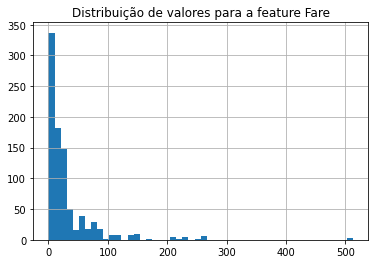

In [8]:
var='Fare' #indica o valor da passagem
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde a maior parte das pessoas pagaram entre 0 e 100. Feature variando entre 0 e 512.
#print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
print(train_data[var].describe())

ax=train_data[var].hist(bins=50)
ax.set_title('Distribuição de valores para a feature '+var)

print('Porcentagem de pessoas que pagaram até 50: ', len(train_data[train_data['Fare']<50])/len(train_data)*100)
print('Porcentagem de pessoas que pagaram até 100: ', len(train_data[train_data['Fare']<100])/len(train_data)*100)

print('Valores de passagens para classe 3:\n', train_data['Fare'][train_data['Pclass']==3].describe(), '\n')
print('Valores de passagens para classe 2:\n',train_data['Fare'][train_data['Pclass']==2].describe(), '\n')
print('Valores de passagens para classe 1:\n',train_data['Fare'][train_data['Pclass']==1].describe(), '\n')

**Feature Parch:** Indica com quantos acompanhantes a pessoa estava viajando, sendo eles pais ou filhos.

* Sem dados faltantes.
* Valores desbalanceados, onde 76% das pessoas estavam viajando sem os pais ou filhos, e 13% estava viajando com apenas um desses acompanhantes.

Total de valores da feature Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Porcentagem total de valores da feature Parch:
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

Classes de valores únicos da feature Parch:
[0 1 2 5 3 4 6]



Text(0.5, 1.0, 'Distribuição de valores para a feature Parch')

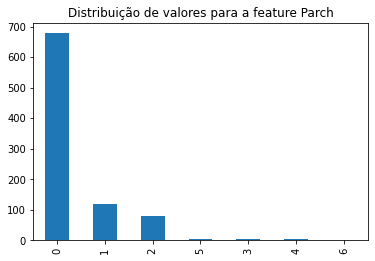

In [9]:
var='Parch' #indica com quantos acompanhantes a pessoa estava viajando, sendo eles pais ou filhos
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 76% das pessoas estavam viajando sem os pais ou filhos
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

**Feature SibSp:** Indica com quantos acompanhantes a pessoa estava viajando, sendo eles irmãos ou cônjuge.

* Sem dados faltantes.
* Valores desbalanceados, onde 78% das pessoas estavam viajando sem irmãos ou cônjuge, e 23% estavam viajando com apenas um desses acompanhantes.

Total de valores da feature SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Porcentagem total de valores da feature SibSp:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

Classes de valores únicos da feature SibSp:
[1 0 3 4 2 5 8]



Text(0.5, 1.0, 'Distribuição de valores para a feature SibSp')

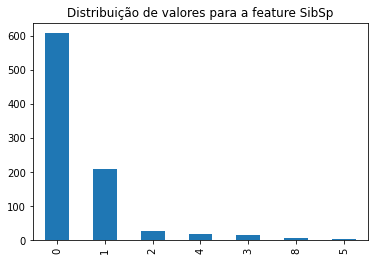

In [10]:
var='SibSp' #indica com quantos acompanhantes a pessoa estava viajando, sendo eles irmãos ou cônjuge
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 78% das pessoas estavam viajando sem irmãos ou cônjuge
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature
ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

**Feature Parch e SibSp: Soma das duas features para representar o total de acompanhantes de um passageiro, sendo eles pais, filhos, irmãos ou cônjuge.**

* Valores desbalanceados, onde 60% (537) das pessoas estavam viajando sozinhas, e 18% (161) estavam viajando com apenas um acompanhante.
*Total de pessoas com um ou mais acompanhantes: 354 pessoas (40%).
*Total de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge:  142 pessoas.
* Porcentagem de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge:  15.94%

Total de valores da feature Parch_SibSp:
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Parch_SibSp, dtype: int64
Porcentagem total de valores da feature Parch_SibSp:
0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: Parch_SibSp, dtype: float64

Classes de valores únicos da feature Parch_SibSp:
[ 1  0  4  2  6  5  3  7 10]

Total de pessoas com um ou mais acompanhantes:  354
Total de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge:  142
Porcentagem de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge:  15.937149270482603


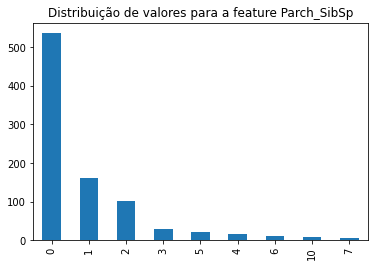

In [32]:
train_data['Parch_SibSp']=train_data['Parch']+train_data['SibSp']
train_data['Parch_SibSp'].describe()

var='Parch_SibSp' #indica com quantos acompanhantes a pessoa estava viajando
print('Total de valores da feature %s:\n%s' % (var, train_data[var].value_counts()))
print('Porcentagem total de valores da feature %s:\n%s\n' % (var, train_data[var].value_counts(normalize=True))) #feature com valores desbalanceados, onde 60% das pessoas estavam viajando sozinhas
print('Classes de valores únicos da feature %s:\n%s\n'  % (var, train_data[var].unique())) #descrição dos valores únicos da feature

ax=train_data[var].value_counts().plot.bar()
ax.set_title('Distribuição de valores para a feature '+var)

print('Total de pessoas com um ou mais acompanhantes: ', len(train_data[(train_data['Parch_SibSp']>0)]))
print('Total de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge: ', len(train_data[(train_data['Parch']>0) & (train_data['SibSp']>0)]))
print('Porcentagem de pessoas com mais de um acompanhante, sendo pai ou filho e irmão ou cônjuge: ', len(train_data[(train_data['Parch']>0) & (train_data['SibSp']>0)])/len(train_data)*100)


# **Correlation between features**

# **Feature Transformation**

Transformation of nominal features to numerical features.


In [12]:
#features = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
#print(train_data['Sex'].value_counts())
#print(train_data['Embarked'].value_counts())

##Transformation of nominal features to numerical features
def sex_to_bin(val):
    if val=='female':
        return 1
    else:
        return 0

def embarked_to_bin(val):
    if val=='S':
        return 0
    elif val=='C':
        return 1
    elif val=='Q':
        return 2

train_data['Sex_bin']=train_data['Sex'].map(sex_to_bin)
test_data['Sex_bin']=test_data['Sex'].map(sex_to_bin)

train_data['Embarked_bin']=train_data['Embarked'].map(embarked_to_bin)
test_data['Embarked_bin']=test_data['Embarked'].map(embarked_to_bin)

#Booleans
train_data['Cabin_null']=train_data['Cabin'].isnull().astype(int) 
test_data['Cabin_null']=test_data['Cabin'].isnull().astype(int)

train_data['Embarked_S']=(train_data['Embarked']=='S').astype(int) 
test_data['Embarked_S']=(test_data['Embarked']=='S').astype(int)

train_data['Embarked_C']=(train_data['Embarked']=='C').astype(int) 
test_data['Embarked_C']=(test_data['Embarked']=='C').astype(int) 

train_data['Name_have_Miss']=train_data['Name'].str.contains('Miss').astype(int)
train_data['Name_have_Mrs']=train_data['Name'].str.contains('Mrs').astype(int)

train_data['Name_have_Mr']=train_data['Name'].str.contains('Mr').astype(int)
train_data['Name_have_Master']=train_data['Name'].str.contains('Master').astype(int)
train_data['Name_have_Col']=train_data['Name'].str.contains('Col').astype(int)
train_data['Name_have_Major']=train_data['Name'].str.contains('Major').astype(int)

test_data['Name_have_Miss']=test_data['Name'].str.contains('Miss').astype(int)
test_data['Name_have_Mrs']=test_data['Name'].str.contains('Mrs').astype(int)

test_data['Name_have_Mr']=test_data['Name'].str.contains('Mr').astype(int)
test_data['Name_have_Master']=test_data['Name'].str.contains('Master').astype(int)
test_data['Name_have_Col']=test_data['Name'].str.contains('Col').astype(int)
test_data['Name_have_Major']=test_data['Name'].str.contains('Major').astype(int)

features = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabin_null', 'Name_have_Miss', 'Name_have_Mrs', 
            'Name_have_Mr', 'Name_have_Master', 'Name_have_Col', 'Name_have_Major']

**The 3 steps of Data Prediction:**

1 - Fit

2 - Validation

3 - Test (Prediction)

**Train Definition**


In [13]:
X = train_data[features]
y = train_data['Survived']
print(X.head(),'\n')
print(y.head())

   Sex_bin   Age  Pclass  ...  Name_have_Master  Name_have_Col  Name_have_Major
0        0  22.0       3  ...                 0              0                0
1        1  38.0       1  ...                 0              0                0
2        1  26.0       3  ...                 0              0                0
3        1  35.0       1  ...                 0              0                0
4        0  35.0       3  ...                 0              0                0

[5 rows x 15 columns] 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


**Treat Missing**

In [14]:
X = X[features].fillna(-1)

**Data split between train and validation datasets**

In [15]:
np.random.seed(0)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.5)
print(train_X.head())

     Sex_bin   Age  Pclass  ...  Name_have_Master  Name_have_Col  Name_have_Major
213        0  30.0       2  ...                 0              0                0
586        0  47.0       2  ...                 0              0                0
499        0  24.0       3  ...                 0              0                0
821        0  27.0       3  ...                 0              0                0
246        1  25.0       3  ...                 0              0                0

[5 rows x 15 columns]


**Test Definition**

In [16]:
X_test=test_data[features]
print(X_test.head(),'\n')

   Sex_bin   Age  Pclass  ...  Name_have_Master  Name_have_Col  Name_have_Major
0        0  34.5       3  ...                 0              0                0
1        1  47.0       3  ...                 0              0                0
2        0  62.0       2  ...                 0              0                0
3        0  27.0       3  ...                 0              0                0
4        1  22.0       3  ...                 0              0                0

[5 rows x 15 columns] 



**Treat Missing**

In [17]:
X_test = X_test[features].fillna(-1)

**ML model - Random Forest**

*Datasets:*

Train: train_X, train_y

Validation: val_X, val_y

Test: X_test

**Train step**

In [18]:
##training
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf_model.fit(train_X, train_y)

##prediction
rf_val_predictions = rf_model.predict(val_X)
print(rf_val_predictions)

[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0]


**Validation step**

Compare the prediciton for validation and the real target

In [19]:
acc=np.mean(rf_val_predictions==val_y)
print(acc)

##Comparison with the control submission (with only women)
control_predictions=(val_X['Sex_bin']==1).astype(np.int64)
print(np.mean(control_predictions==val_y))

0.7959641255605381
0.7825112107623319


**Cross Validation: *Kfold***

In [20]:
list_acc=[]

kf=RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for l_train, l_val in kf.split(X):
  #print(l_train.shape[0], l_val.shape[0])
  train_X, val_X = X.iloc[l_train], X.iloc[l_val]
  train_y, val_y = y.iloc[l_train], y.iloc[l_val]

  ##training
  #rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  rf_model = LogisticRegression()

  rf_model.fit(train_X, train_y)
  ##prediction
  rf_val_predictions = rf_model.predict(val_X)

  acc=np.mean(rf_val_predictions==val_y)
  list_acc.append(acc)
print(np.mean(list_acc))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8178372046153071


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
print(np.mean(list_acc))

0.8178372046153071


**Error analysis of features: Improve results**

Comparing the predicted result with the expected output in recpect of the other variables

In [22]:
val_X_check = train_data.iloc[l_val].copy()
val_X_check['Prediction'] = rf_val_predictions
val_X_check.head()
X_errors=val_X_check[val_X_check['Survived']!=val_X_check['Prediction']]
X_errors=X_errors[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_bin',
       'Embarked_bin', 'Prediction', 'Survived']]
#X_errors.describe()
X_errors.head()

X_women=X_errors[X_errors['Sex_bin']==1]
X_men=X_errors[X_errors['Sex_bin']==0]
#print(X_women.sort_values('Survived'))
print(X_men.sort_values('Survived'))


     PassengerId  Pclass  ... Prediction Survived
475          476       1  ...          1        0
452          453       1  ...          1        0
373          374       1  ...          1        0
766          767       1  ...          1        0
185          186       1  ...          1        0
536          537       1  ...          1        0
139          140       1  ...          1        0
118          119       1  ...          1        0
788          789       3  ...          0        1
569          570       3  ...          0        1
579          580       3  ...          0        1
838          839       3  ...          0        1
599          600       1  ...          0        1
604          605       1  ...          0        1
621          622       1  ...          0        1
622          623       3  ...          0        1
643          644       3  ...          0        1
804          805       3  ...          0        1
821          822       3  ...          0        1


**Plotting results**

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([3., 1., 3., 5., 2., 0., 2., 1., 1., 2.]),
 array([0.8       , 0.80408072, 0.80816143, 0.81224215, 0.81632287,
        0.82040359, 0.8244843 , 0.82856502, 0.83264574, 0.83672646,
        0.84080717]),
 <a list of 10 Patch objects>)

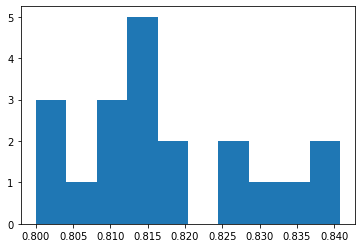

In [23]:
%matplotlib inline
%pylab inline
pylab.hist(list_acc)

**Test step**

Including the entire train and test sets

In [24]:
##training
#rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf_model = LogisticRegression()
rf_model.fit(X, y)

##prediction
rf_val_predictions = rf_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Save predictions in format used for Titanic competition scoring**

In [25]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': rf_val_predictions})

#output = pd.Series(rf_val_predictions, index=test_data['PassengerId'], name='Survived')

output.to_csv('submission.csv', header=True, index=False)
!head -n10 submission.csv
#files.download('submission.csv')

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
